In [1]:
##############################################
#Explorative Data Analysis of Baserun results#
#Maintainer: Christopher Chan                #
#Date: 2022-07-26                            #
#Version: 0.1.3                              #
##############################################

import os, sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Base_path = os.path.abspath("/home/chris/Dropbox/HOTOSM/HOTOSM_OAM_codeV2")
figure_path = os.path.join(Base_path, "figure")
BR_KBYpath = os.path.join(Base_path, "iter_log", "BASE_15cmKBY")
BR_ALLpath = os.path.join(Base_path, "iter_log", "BASE_15cmALL")

In [2]:
# Transform and plotting of mean window vs global statistics
GLOB_csv = pd.read_csv(os.path.join(Base_path, "GlobXP_STATS.csv"))

GLOB_csv

,Experiment,mean_Precision,mean_Recall(TPR),mean_Specificity(TNR),mean_OA,mean_Dice,mean_IoU
0,globKBY_4Unet,0.876089,0.957042,0.988150,0.985646,0.914778,0.842941
1,globKBY_5Unet,0.887338,0.954440,0.989391,0.986578,0.919666,0.851280
2,globKBY_EB1-Unet-IMN,0.906424,0.968574,0.991246,0.989421,0.936469,0.880528
3,globKBY_EB1-Unet-qubvel,0.905570,0.974020,0.991108,0.989733,0.938549,0.884213
4,globKBY_EB1-Unet-NoIMN,0.902977,0.960412,0.990966,0.988506,0.930810,0.870574
5,globKBY_EB2-Unet-IMN,0.909726,0.962329,0.991640,0.989280,0.935289,0.878443
6,globKBY_EB2-Unet-NoIMN,0.900405,0.948631,0.990814,0.987418,0.923889,0.858544
7,globALL_4Unet,0.810815,0.941240,0.939060,0.939534,0.871173,0.771751
8,globALL_5Unet,0.817440,0.939155,0.941800,0.941225,0.874081,0.776326
9,globALL_EB1-Unet-IMN,0.787711,0.936536,0.929964,0.931392,0.855701,0.747795


In [3]:
# Rename Experiment
GLOB_csv["Experiment"] = GLOB_csv["Experiment"].replace({"globKBY_4Unet": "[KBY] 4-layer U-Net",
                                                         "globKBY_5Unet": "[KBY] 5-layer U-Net",
                                                         "globKBY_EB1-Unet-IMN": "[KBY] EfficientNet B1 U-Net (ImageNet)", 
                                                         "globKBY_EB1-Unet-qubvel": "[KBY] EfficientNet B1 U-Net (OCC-transfered-trained)",
                                                         "globKBY_EB1-Unet-NoIMN": "[KBY] EfficientNet B1 U-Net (Vanilla | No ImageNet)",
                                                         "globKBY_EB2-Unet-IMN": "[KBY] EfficientNet B2 U-Net (ImageNet)",
                                                         "globKBY_EB2-Unet-NoIMN": "[KBY] EfficientNet B2 U-Net (Vanilla | No ImageNet)",
                                                         
                                                         "globALL_4Unet": "4-layer U-Net",
                                                         "globALL_5Unet": "5-layer U-Net",
                                                         "globALL_EB1-Unet-IMN": "EfficientNet B1 U-Net (ImageNet)", 
                                                         "globALL_EB1-Unet-qubvel": "EfficientNet B1 U-Net (OCC-transfered-trained)",
                                                         "globALL_EB1-Unet-NoIMN": "EfficientNet B1 U-Net (Vanilla | No ImageNet)",
                                                         "globALL_EB2-Unet-IMN": "EfficientNet B2 U-Net (ImageNet)",
                                                         "globALL_EB2-Unet-NoIMN": "EfficientNet B2 U-Net (Vanilla | No ImageNet)"})

GLOB_csv

,Experiment,mean_Precision,mean_Recall(TPR),mean_Specificity(TNR),mean_OA,mean_Dice,mean_IoU
0,[KBY] 4-layer U-Net,0.876089,0.957042,0.988150,0.985646,0.914778,0.842941
1,[KBY] 5-layer U-Net,0.887338,0.954440,0.989391,0.986578,0.919666,0.851280
2,[KBY] EfficientNet B1 U-Net (ImageNet),0.906424,0.968574,0.991246,0.989421,0.936469,0.880528
3,[KBY] EfficientNet B1 U-Net (OCC-transfered-tr...,0.905570,0.974020,0.991108,0.989733,0.938549,0.884213
4,[KBY] EfficientNet B1 U-Net (Vanilla | No Imag...,0.902977,0.960412,0.990966,0.988506,0.930810,0.870574
5,[KBY] EfficientNet B2 U-Net (ImageNet),0.909726,0.962329,0.991640,0.989280,0.935289,0.878443
6,[KBY] EfficientNet B2 U-Net (Vanilla | No Imag...,0.900405,0.948631,0.990814,0.987418,0.923889,0.858544
7,4-layer U-Net,0.810815,0.941240,0.939060,0.939534,0.871173,0.771751
8,5-layer U-Net,0.817440,0.939155,0.941800,0.941225,0.874081,0.776326
9,EfficientNet B1 U-Net (ImageNet),0.787711,0.936536,0.929964,0.931392,0.855701,0.747795


In [4]:
GLOB2_csv = pd.read_csv(os.path.join(Base_path, "GlobXP_STATS2.csv"))

# Rename Experiment
GLOB2_csv["Experiment"] = GLOB2_csv["Experiment"].replace({"4Unet": "4-layer U-Net",
                                                           "5Unet": "5-layer U-Net",
                                                           "EB1-Unet-IMN": "EfficientNet B1 U-Net (ImageNet)",
                                                           "EB1-Unet-qubvel": "EfficientNet B1 U-Net (OCC-transfered-trained)",
                                                           "EB1-Unet-NoIMN": "EfficientNet B1 U-Net (Vanilla | No ImageNet)",
                                                           "EB2-Unet-IMN": "EfficientNet B2 U-Net (ImageNet)",
                                                           "EB2-Unet-NoIMN": "EfficientNet B2 U-Net (Vanilla | No ImageNet)"})

set_group = GLOB2_csv.groupby(GLOB2_csv["Input_dataset"])

print(set_group)

KBY_csv = set_group.get_group("KBY")
ALL_csv  = set_group.get_group("ALL")

GLOB2_csv

,Experiment,mean_Precision,mean_Recall(TPR),mean_Specificity(TNR),mean_OA,mean_Dice,mean_IoU,Input_dataset
0,4-layer U-Net,0.876089,0.957042,0.988150,0.985646,0.914778,0.842941,KBY
1,5-layer U-Net,0.887338,0.954440,0.989391,0.986578,0.919666,0.851280,KBY
2,EfficientNet B1 U-Net (ImageNet),0.906424,0.968574,0.991246,0.989421,0.936469,0.880528,KBY
3,EfficientNet B1 U-Net (Vanilla | No ImageNet),0.902977,0.960412,0.990966,0.988506,0.930810,0.870574,KBY
4,EfficientNet B1 U-Net (OCC-transfered-trained),0.905570,0.974020,0.991108,0.989733,0.938549,0.884213,KBY
5,EfficientNet B2 U-Net (ImageNet),0.909726,0.962329,0.991640,0.989280,0.935289,0.878443,KBY
6,EfficientNet B2 U-Net (Vanilla | No ImageNet),0.900405,0.948631,0.990814,0.987418,0.923889,0.858544,KBY
7,4-layer U-Net,0.810815,0.941240,0.939060,0.939534,0.871173,0.771751,ALL
8,5-layer U-Net,0.817440,0.939155,0.941800,0.941225,0.874081,0.776326,ALL
9,EfficientNet B1 U-Net (ImageNet),0.787711,0.936536,0.929964,0.931392,0.855701,0.747795,ALL


In [5]:
print(KBY_csv.columns[1:7])

Index(['mean_Precision', 'mean_Recall(TPR)', 'mean_Specificity(TNR)',
       'mean_OA', 'mean_Dice', 'mean_IoU'],
      dtype='object')


In [6]:
# Try long format
#GLOB2_csv_L = pd.melt(GLOB2_csv, id_vars = ["Experiment", "Input_dataset"],
#                      value_vars = ["mean_Precision", "mean_Recall(TPR)", "mean_Specificity(TNR)", "mean_OA", "mean_Dice", "mean_IoU"])
GLOB2_csv_L = pd.melt(GLOB2_csv, id_vars = ["Experiment", "Input_dataset"])
print(GLOB2_csv_L.info())
#GLOB2_csv_L = pd.melt(GLOB2_csv_L, id_vars = ["Experiment", "Input_dataset", "variable"])

GLOB2_csv_L

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Experiment     84 non-null     object 
 1   Input_dataset  84 non-null     object 
 2   variable       84 non-null     object 
 3   value          84 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.8+ KB
None


,Experiment,Input_dataset,variable,value
0,4-layer U-Net,KBY,mean_Precision,0.876089
1,5-layer U-Net,KBY,mean_Precision,0.887338
2,EfficientNet B1 U-Net (ImageNet),KBY,mean_Precision,0.906424
3,EfficientNet B1 U-Net (Vanilla | No ImageNet),KBY,mean_Precision,0.902977
4,EfficientNet B1 U-Net (OCC-transfered-trained),KBY,mean_Precision,0.905570
...,...,...,...,...
79,EfficientNet B1 U-Net (ImageNet),ALL,mean_IoU,0.747795
80,EfficientNet B1 U-Net (Vanilla | No ImageNet),ALL,mean_IoU,0.727169
81,EfficientNet B1 U-Net (OCC-transfered-trained),ALL,mean_IoU,0.738069
82,EfficientNet B2 U-Net (ImageNet),ALL,mean_IoU,0.740761


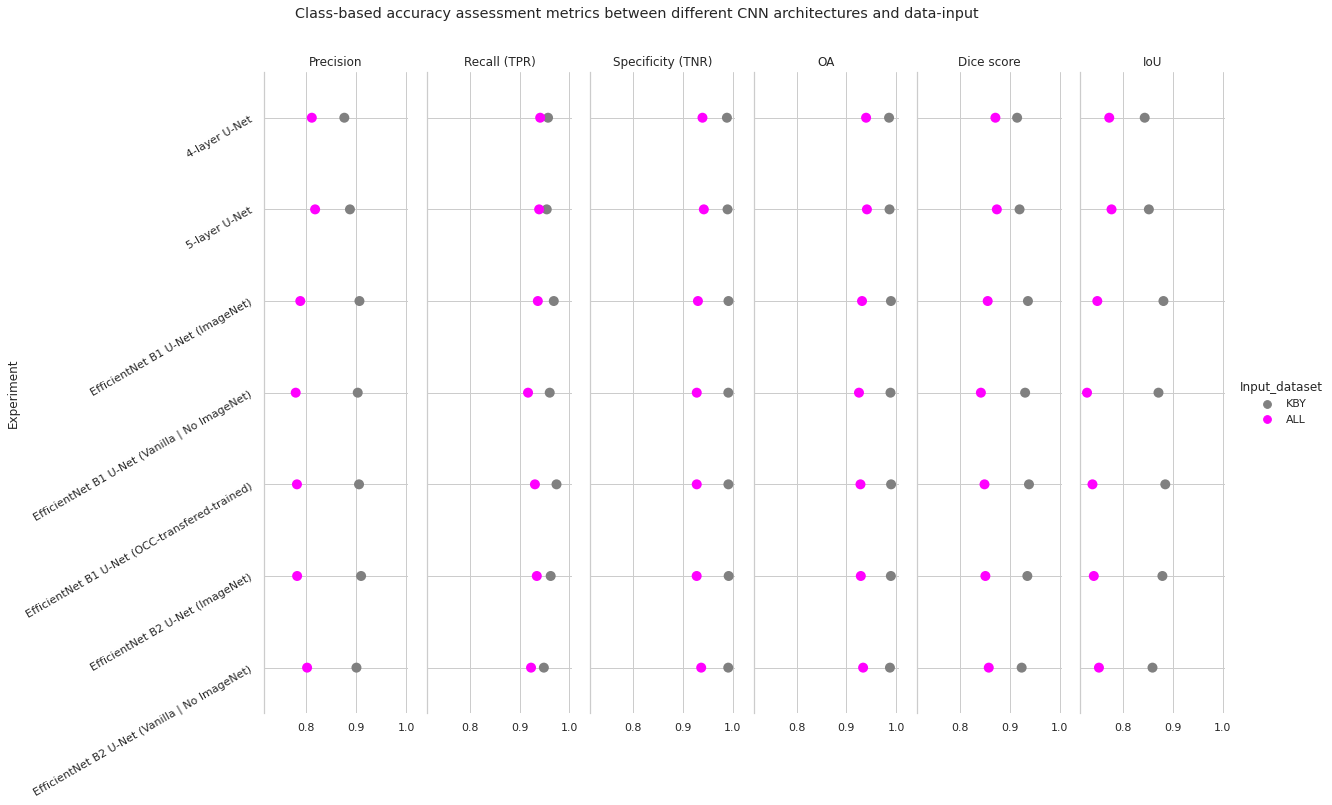

In [7]:
sns.set_theme(style="whitegrid")

cpalette = ["gray", "magenta"]

Cat_CAA = sns.catplot(data = GLOB2_csv_L, x = "value", y = "Experiment",
                      hue = "Input_dataset", col = "variable",
                      kind = "strip", jitter = False,
                      height = 10, aspect = 0.3, orient = "h",
                      sharey = True, s = 10,
                      palette = cpalette);

# Use semantically meaningful titles for the columns
titles = ["Precision", "Recall (TPR)", "Specificity (TNR)", "OA", 
          "Dice score", "IoU"]

Cat_CAA.fig.suptitle("Class-based accuracy assessment metrics between different CNN architectures and data-input", y = 1.05)
Cat_CAA.despine(bottom = True)

for ax, title in zip(Cat_CAA.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title = title)
    
    for label in ax.axes.get_yticklabels(which = 'major'):
        label.set(rotation=30, horizontalalignment = 'right')

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_xlabel("")
    
plt.show()